In [1]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

TAREA: Captura una o varias imágenes con monedas no solapadas y algún objeto que no lo sea. Filtra los contornos que no se correpondan con monedas, y muestra el número total de monedas presentes en la imagen.

(2736, 3648, 3)


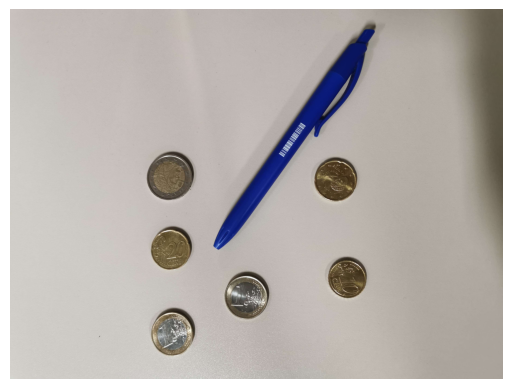

In [2]:
#Carga imagen ejemplo con monedas
img = cv2.imread('media/monedas_boligrafo.jpg') 
print(img.shape)
#Recordando que OpenCV lee las imágenes en BGR, por lo que convertimos para visualizr RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.axis("off")
plt.imshow(img_rgb) 
plt.show()

(0.0, 256.0)

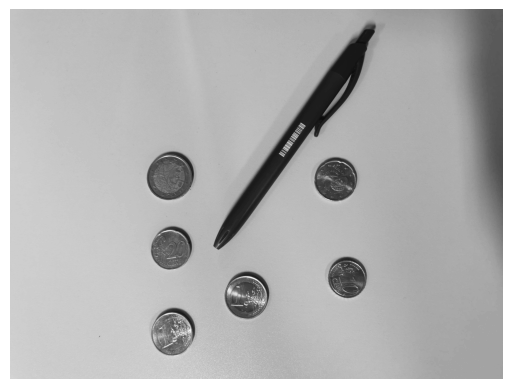

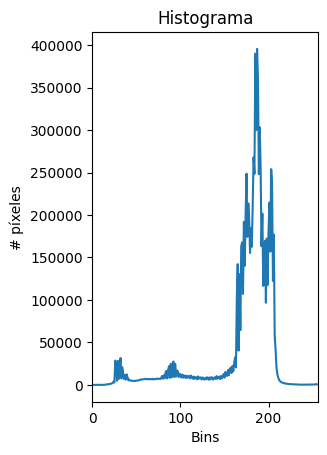

In [3]:
#Convierte la imagen a todos de gris, mostrando el resultado
img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Cálculo del histograma con 256 bins de una imagen en escala de grises
hist = cv2.calcHist([img_gris], [0], None, [256], [0, 256])

plt.figure()
plt.axis("off")
plt.imshow(img_gris, cmap='gray')

# Histograma sin normalizar
plt.figure()
plt.subplot(1, 2, 1)
plt.title("Histograma")
plt.xlabel("Bins")
plt.ylabel("# píxeles")
plt.plot(hist)
plt.xlim([0, 256])

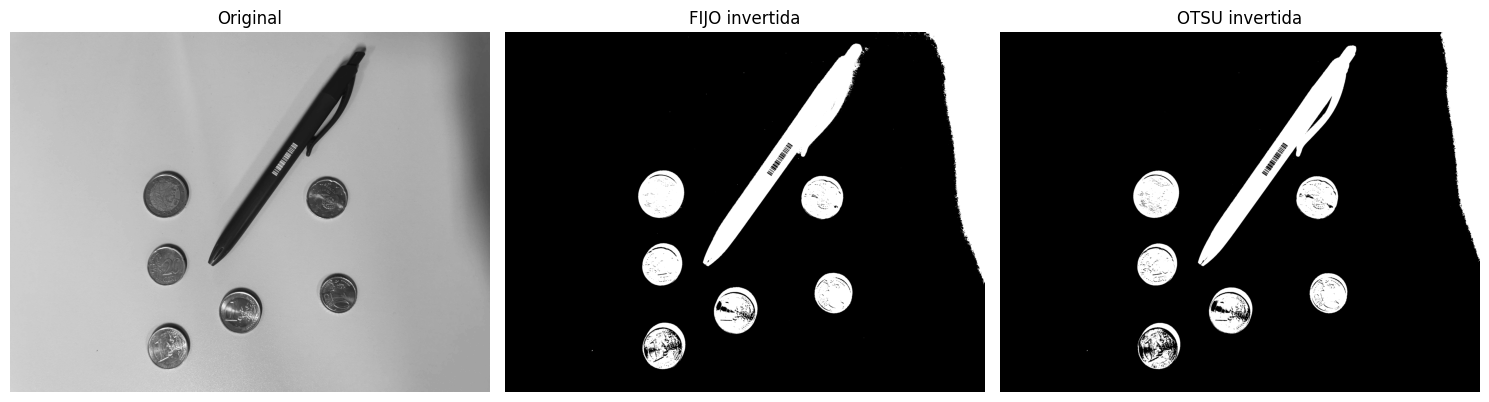

In [4]:
#Dos umbralizados. Te invito a probar con parámetros, aplicar filtro previo, etc.
umbral = 150
# Umbralizado binaria invertido, dado que por defecto se asume objetos en blanco
res,img_th1 = cv2.threshold(img_gris,umbral,255,cv2.THRESH_BINARY_INV)
# Umbralizado con método de Otsu
ret2,img_th2 = cv2.threshold(img_gris,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

plt.figure(figsize=(15, 5))


plt.subplot(1, 3, 1)
plt.axis("off")
plt.imshow(img_gris,cmap='gray') 
plt.title('Original')

plt.subplot(1, 3, 2)
plt.axis("off")
plt.imshow(img_th1,cmap='gray') 
plt.title('FIJO invertida')

plt.subplot(1, 3, 3)
plt.axis("off")
plt.imshow(img_th2,cmap='gray') 
plt.title('OTSU invertida')


plt.tight_layout()
plt.show()


radio: 179.39022827148438
radio: 178.42466735839844
radio: 155.08517456054688
radio: 164.30014038085938
radio: 165.85205078125
radio: 185.8228302001953
radio: 10.404426574707031


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


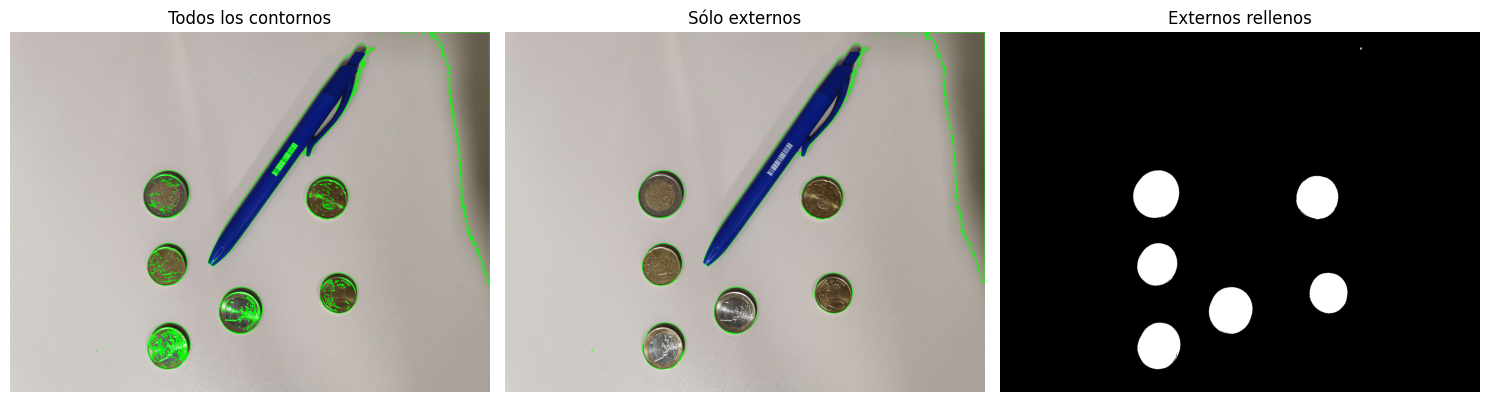

In [5]:
#Localiza contornos en imagen obtenida con umbral fijo
#findContours está diseñada para imágenes con la figura en blanco y el fondo negro
#La imagen de entrada debe ser de un canal y 8 bits excepto en los modos RETR_CCOMP o RETR_FLOODFILL
#hierarchy contiene información sobre el nivel del contorno, relaciones paterno-filiales

#Obtiene todos los contornos, externos e internos
contornos, hierarchy = cv2.findContours(
    img_th1, #imagen
    cv2.RETR_TREE, #Modo de recuperación (lista, árbol, nivel superior)
    cv2.CHAIN_APPROX_SIMPLE #Método de aproximación del contorno
    )
#Obtiene únicamente los contornos externos
contornos2, hierarchy2 = cv2.findContours(img_th1, 
    cv2.RETR_EXTERNAL , 
    cv2.CHAIN_APPROX_SIMPLE)

# Dibuja sobre la imagen de entrada todos los contornos en verde
#Cada vez que quiere pintar convierte img para no tener restos
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.drawContours(img_rgb, contornos, -1, (0,255,0), 3)

plt.figure(figsize=(15,5))

plt.subplot(131)
plt.axis("off")
plt.imshow(img_rgb) 
plt.title('Todos los contornos')

# Dibuja sobre la imagen de entrada sólo contornos externos
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.drawContours(img_rgb, contornos2, -1, (0,255,0), 3)

plt.subplot(132)
plt.axis("off")
plt.imshow(img_rgb) 
plt.title('Sólo externos')

#Dibuja contornos externos rellenos en imagen vacía
#crea imagen vacíanegra
img_cont = np.zeros(img_rgb.shape)
for c in contornos2:
    #Área delcontorno
    area = cv2.contourArea(c)


    #Dimensión mínima (útil en ocasiones)
    if area > 50:
        #Perímetro delcontorno
        perimetro = cv2.arcLength(c,True)
        #Contenedor alineado con ejes de la imagen
        x,y,w,h = cv2.boundingRect(c)
        #Mínimo contenedor ajustado para el contorno
        rect = cv2.minAreaRect(c)
        #Mínimo círculo que lo contiene
        (cx,cy),radio = cv2.minEnclosingCircle(c)
        calculo_area = np.pi * np.square(radio)
        
        #Elipse ajustada al contorno
        if c.shape[0] > 5:
            elipse = cv2.fitEllipse(c)
            #Para determinadas tareas nos interesará mostrar estos valores
            #print(area, perimetro, rect, cx,cy,radio, elipse)

        #Dibuja los contornos
        if abs(area - calculo_area) < 100000:
            print("radio:", radio)

            cv2.drawContours(img_cont, [c], -1, (255,255,255), -1)

plt.subplot(133)
plt.axis("off")
plt.imshow(img_cont) 
plt.title('Externos rellenos')


plt.tight_layout()
plt.show()


TAREA: Captura una o varias imágenes con monedas no solapadas, y otras con monedas solapadas. Identificada una moneda de un euro en la imagen, por ejemplo con un clic de ratón, calcular la cantidad de dinero presente en la imagen. ¿Qué problemas han observado?

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Moneda de 20 cent
Moneda de 1 euro
Moneda de 1 euro
Moneda de 2 euros
Moneda de 10 cent
Moneda de 1 euro
Moneda de 10 cent
En la imagen hay 7 monedas


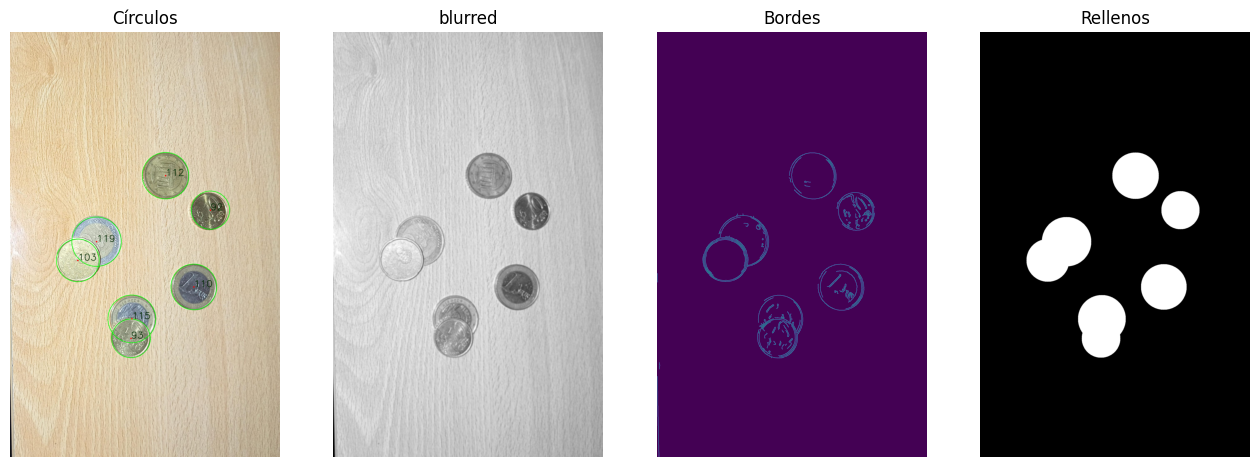

In [108]:
img = cv2.imread("media/monedones_solapados.jpg")
img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_cont = np.zeros(img.shape)

res,img_th1 = cv2.threshold(img_gris,umbral,255,cv2.THRESH_BINARY_INV)

gray_blurred = cv2.GaussianBlur(img_gris, (9, 9), 2)
edges = cv2.Canny(gray_blurred, threshold1=50, threshold2=150)

# Busqueda de los circulos
circles = cv2.HoughCircles(
    edges,
    cv2.HOUGH_GRADIENT,
    dp=1,  
    minDist=50, 
    param1=140,  
    param2=20,  
    minRadius=90,  
    maxRadius=120  
)

# Radios aproximados de las monedas
un_euro_cincuenta_cent_max = 115
veinte_cent_max = 105
diez_cent_max = 95

if circles is not None:
    circles = np.uint16(np.around(circles))
    for circle in circles[0, :]:
        center = (circle[0], circle[1])
        radius = circle[2]

        # Dibujo de los circulos y contornos
        cv2.circle(img, center, radius, (0, 255, 0), 2)
        cv2.circle(img, center, 2, (0, 0, 255), 3)
        cv2.circle(img_cont, center, radius, (255, 255, 255), -1)
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img, str(radius), center, font, 1.5, (0, 40, 0), 2)


        # Clasificación de monedas
        if radius <= diez_cent_max:
            print("Moneda de 10 cent")
        elif radius <= veinte_cent_max:
            print("Moneda de 20 cent")
        elif radius <= un_euro_cincuenta_cent_max:
            # Falla porque 1 euro y 50 cent son muy similares
            print("Moneda de 1 euro")
        else:
            print("Moneda de 2 euros")



print("En la imagen hay", len(circles[0, :]), "monedas")


# Muestra de las imagenes
plt.figure(figsize=(16, 8))

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.subplot(141)
plt.axis("off")
plt.imshow(img_rgb) 
plt.title('Círculos')

plt.subplot(142)
plt.axis("off")
plt.imshow(gray_blurred, cmap="gray") 
plt.title('blurred')

plt.subplot(143)
plt.axis("off")
plt.imshow(edges) 
plt.title('Bordes')

plt.subplot(144)
plt.axis("off")
plt.imshow(img_cont) 
plt.title('Rellenos')

plt.show()


In [110]:
img = cv2.imread("media/monedones_solapados.jpg")
img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_cont = np.zeros(img.shape)

res,img_th1 = cv2.threshold(img_gris,umbral,255,cv2.THRESH_BINARY_INV)

gray_blurred = cv2.GaussianBlur(img_gris, (9, 9), 2)
edges = cv2.Canny(gray_blurred, threshold1=50, threshold2=150)

# Funcion onclick en un circulo
def on_click(event, x, y, flags, params):
    global selected_circle
    if event == cv2.EVENT_LBUTTONDOWN:
        # Calcula la distancia del clic de ratón a cada círculo y selecciona el más cercano
        min_distance = float('inf')
        for circle in circles[0]:
            center = (circle[0], circle[1])
            radius = circle[2]
            distance = np.sqrt((x - center[0]) ** 2 + (y - center[1]) ** 2)
            if distance < min_distance:
                min_distance = distance
                selected_circle = circle
        if selected_circle is not None:
            print("")
            cv2.destroyAllWindows()

# Busqueda de los circulos
circles = cv2.HoughCircles(
    edges,
    cv2.HOUGH_GRADIENT,
    dp=1,  
    minDist=50, 
    param1=140,  
    param2=20,  
    minRadius=90,  
    maxRadius=120  
)

# Seleccion de una moneda en la imagen
selected_circle = None
cv2.namedWindow('Imagen con Círculos', cv2.WINDOW_NORMAL)
cv2.resizeWindow('Imagen con Círculos', 600, 600)
selected_circle = cv2.setMouseCallback('Imagen con Círculos', on_click)

# Muestra la imagen con círculos
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.imshow('Imagen con Círculos', img_rgb)

cv2.waitKey(0)
cv2.destroyAllWindows()

# Radios aproximados de las monedas
un_euro_cincuenta_cent_max = 115
veinte_cent_max = 105
diez_cent_max = 95

if circles is not None:
    circles = np.uint16(np.around(circles))
    selected_radius = selected_circle[2]
    for circle in circles[0, :]:
        center = (circle[0], circle[1])
        radius = circle[2]

        # Clasificación de monedas
        if radius <= diez_cent_max and abs(radius - selected_radius) <=2:
            print("Moneda seleccionada de 10 cent")
            break
        elif radius <= veinte_cent_max and abs(radius - selected_radius) <=2:
            print("Moneda seleccionada de 20 cent")
            break
        elif radius <= un_euro_cincuenta_cent_max and abs(radius - selected_radius) <=2:
            print("Moneda seleccionada de 1 euro")
            break
        elif abs(radius - selected_radius) <=2:
            print("Moneda seleccionada de 2 euros")
            break



Moneda seleccionada de 1 euro


TAREA: Estas tres imágenes han sido extraidas de las imágenes de mayor tamaño contenidas en la carpeta. Determina patrones geométricos para cada una de las tres clases y evalúa los aciertos y fallos con las imágenes completas la matriz de confusión. Para cada clase, determina el número de muestras que se clasifican correctamente de dicha clase, y el número de muestras que se clasifica incorrectamente por cada una de las otras dos clases.

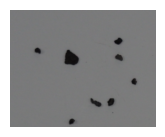

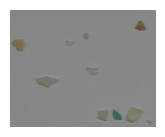

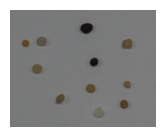

In [112]:
img_tar = cv2.imread('media/TAR.png') 
img_tar_rgb = cv2.cvtColor(img_tar, cv2.COLOR_BGR2RGB)

img_fra = cv2.imread('media/FRA.png') 
img_fra_rgb = cv2.cvtColor(img_fra, cv2.COLOR_BGR2RGB)

img_pel = cv2.imread('media/PEL.png') 
img_pel_rgb = cv2.cvtColor(img_pel, cv2.COLOR_BGR2RGB)

plt.subplot(131)
plt.axis("off")
plt.imshow(img_tar_rgb) 
plt.show()

plt.subplot(132)
plt.axis("off")
plt.imshow(img_fra_rgb) 
plt.show()

plt.subplot(133)
plt.axis("off")
plt.imshow(img_pel_rgb) 
plt.show()

C:\Users\thewi\AppData\Local\Temp\ipykernel_1848\686520390.py:36: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


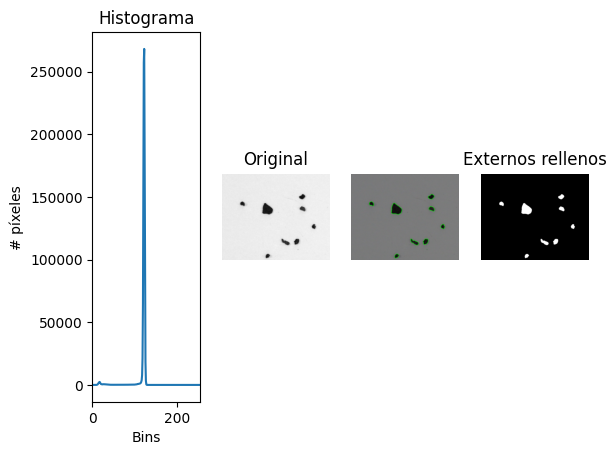

In [121]:
#Convierte la imagen a todos de gris, mostrando el resultado
img_gris = cv2.cvtColor(img_tar_rgb, cv2.COLOR_BGR2GRAY)

#Cálculo del histograma con 256 bins de una imagen en escala de grises
hist = cv2.calcHist([img_gris], [0], None, [256], [0, 256])

# Histograma sin normalizar
plt.figure()
plt.subplot(1,4,1)
plt.title("Histograma")
plt.xlabel("Bins")
plt.ylabel("# píxeles")
plt.plot(hist)
plt.xlim([0, 256])

ret2,img_th2 = cv2.threshold(img_gris,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

plt.subplot(1,4,2)
plt.axis("off")
plt.imshow(img_gris,cmap='gray') 
plt.title('Original')

plt.subplot(1, 3, 3)
plt.axis("off")
plt.imshow(img_th2,cmap='gray') 
plt.title('OTSU invertida')

contornos2, hierarchy2 = cv2.findContours(img_th2, 
    cv2.RETR_EXTERNAL , 
    cv2.CHAIN_APPROX_SIMPLE)

# Dibuja sobre la imagen de entrada sólo contornos externos
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.drawContours(img_rgb, contornos2, -1, (0,255,0), 3)

plt.subplot(143)
plt.axis("off")
plt.imshow(img_rgb) 

img_cont = np.zeros(img_rgb.shape)

tar_area = []
tar_perimetro = []
tar_rect = []
tar_min_circle = []

mask = np.zeros(img_rgb.shape, dtype=np.uint8)

for c in contornos2:
    area = cv2.contourArea(c)
    if (area > 200):
        cv2.drawContours(mask, [c], -1, (255, 255, 255), thickness=cv2.FILLED)
        
        # Añadir el area
        tar_area.append(area)

        # Añadir el perimetro
        perimetro = cv2.arcLength(c,True)
        tar_perimetro.append(perimetro)

        # Añadir area minima rectangular
        rect = cv2.minAreaRect(c)
        tar_rect.append(rect)

        # Añadir radio y centro del circulo minimo que lo encierra
        (x,y),radio = cv2.minEnclosingCircle(c)
        tar_min_circle.append((x, y, radio))

        #Dibuja los contornos
        cv2.drawContours(img_cont, [c], -1, (255,255,255), -1)

# Dibuja sobre la imagen de entrada sólo contornos externos
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
masked_figure = cv2.bitwise_and(img_rgb, mask)
tar_mean_color = cv2.mean(masked_figure[masked_figure != 0])

plt.subplot(144)
plt.axis("off")
plt.imshow(img_cont) 
plt.title('Externos rellenos')
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


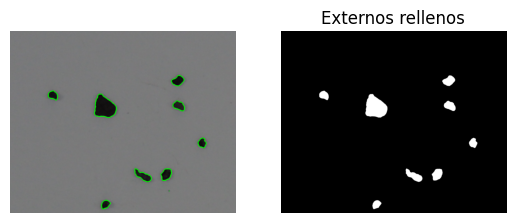